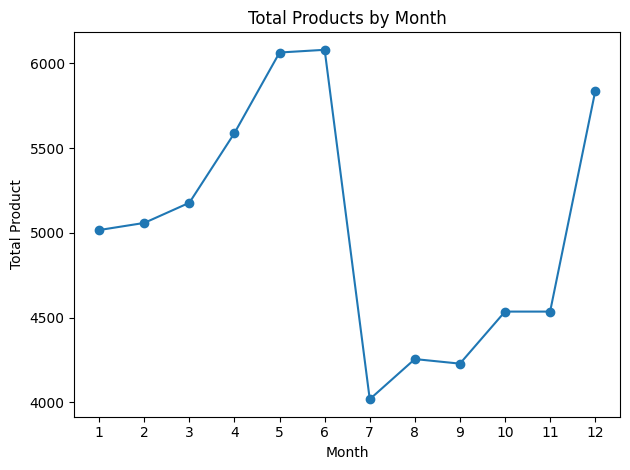

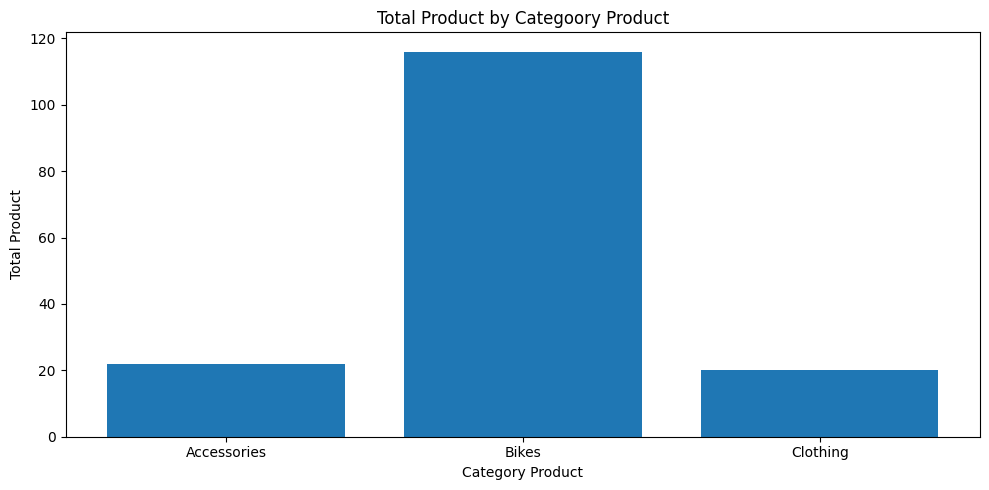

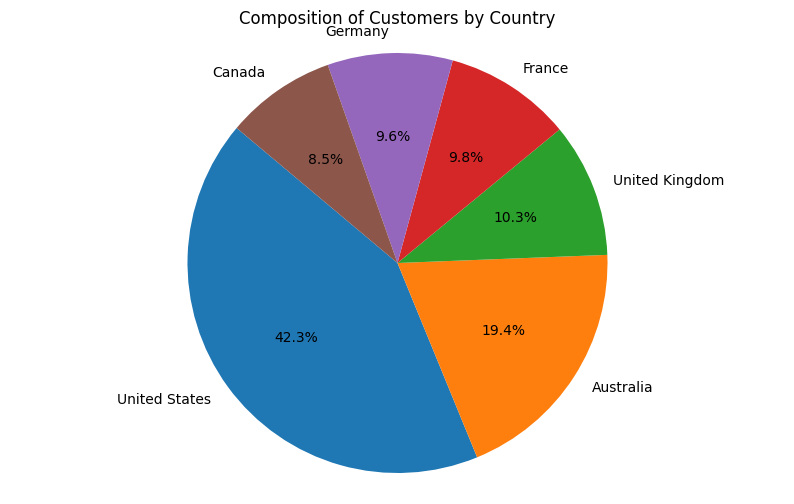

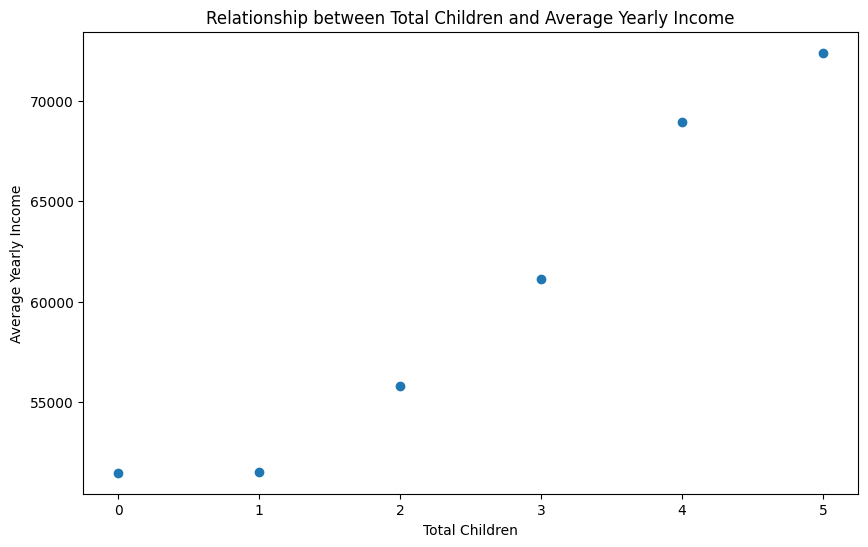

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import squarify
import decimal

# Menghubungkan ke database MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="dump_aw"
)

# Membuat kursor untuk eksekusi query SQL
cursor = conn.cursor()

# Query SQL Comparison
comparison = """
    SELECT 
        t.MonthNumberOfYear AS Month,
        SUM(fs.OrderQuantity) AS Total_Order_Quantity 
    FROM 
        factinternetsales fs 
    JOIN 
        dimtime t ON fs.OrderDateKey = t.TimeKey 
    GROUP BY 
        t.MonthNumberOfYear
    ORDER BY 
        t.MonthNumberOfYear;
"""

# Kuantitas total penjualan

# Eksekusi query
cursor.execute(comparison)

# Mengambil hasil query
results = cursor.fetchall()

# Memproses hasil query ke dalam format yang sesuai untuk grafik
month = []
total_product_by_month = []
for row in results:
    month.append(row[0])  
    total_product_by_month.append(row[1])     

# Plot grafik
plt.plot(month, total_product_by_month, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Product')
plt.title('Total Products by Month')
plt.xticks(month)
plt.tight_layout()
plt.show()

# ==========================================

# Query SQL Distribution
distribution = """
    SELECT 
        dpc.EnglishProductCategoryName AS Category_Product,
        COUNT(dp.ProductKey) AS Total_Procut 
    FROM 
        dimproductcategory dpc
    JOIN 
        dimproductsubcategory dpsc ON dpc.ProductCategoryKey = dpsc.ProductCategoryKey 
    JOIN
        dimproduct dp ON dpsc.ProductsubCategoryKey = dp.ProductsubCategoryKey
    GROUP BY 
        dpc.EnglishProductCategoryName
    ORDER BY 
        dpc.EnglishProductCategoryName;
"""

# Eksekusi query kedua
cursor.execute(distribution)

# Mengambil hasil query kedua
results2 = cursor.fetchall()

# Memproses hasil query kedua ke dalam format yang sesuai untuk grafik
categories_product = []
total_product_by_category_product = []
for row in results2:
    categories_product.append(row[0]) 
    total_product_by_category_product.append(row[1])  

# Plot grafik kedua
plt.figure(figsize=(10, 5))
plt.bar(categories_product, total_product_by_category_product)
plt.xlabel('Category Product')
plt.ylabel('Total Product')
plt.title('Total Product by Categoory Product')
plt.tight_layout()
plt.show()

# ==========================================

# Query SQL Composition
composition = """
    SELECT 
        dg.EnglishCountryRegionName AS Country,
        COUNT(dc.CustomerKey) AS Total_Customer
    FROM 
        dimgeography dg
    JOIN 
        dimcustomer dc ON dg.GeographyKey = dc.GeographyKey
    GROUP BY 
        dg.EnglishCountryRegionName
    ORDER BY
        Total_Customer DESC;
"""

# Eksekusi query ketiga
cursor.execute(composition)

# Mengambil hasil query ketiga
results3 = cursor.fetchall()

# Memproses hasil query ketiga ke dalam format yang sesuai untuk grafik
labels = []
sizes = []
for row in results3:
    labels.append(row[0])
    sizes.append(row[1])

# Plot grafik Donat
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Pastikan lingkaran berbentuk lingkaran
plt.title('Composition of Customers by Country')
plt.show()

# ==========================================

# Query SQL Relationship
relationship = """
    SELECT 
        dc.TotalChildren AS Total_Children,
        ROUND(AVG(dc.YearlyIncome), 2) AS Average_Yearly_Income
    FROM 
        dimcustomer dc
    GROUP BY 
        dc.TotalChildren
    ORDER BY
        Total_Children;
"""

# Eksekusi query ketiga
cursor.execute(relationship)

# Mengambil hasil query ketiga
results4 = cursor.fetchall()

# Memproses hasil query keempat ke dalam format yang sesuai untuk grafik scatter plot
total_children = []
average_yearly_income = []
for row in results4:
    total_children.append(row[0])
    average_yearly_income.append(row[1])

# Plot grafik Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(total_children, average_yearly_income)
plt.xlabel('Total Children')
plt.ylabel('Average Yearly Income')
plt.title('Relationship between Total Children and Average Yearly Income')
plt.show()